Project 1, Group 3 - Places to Bike
Overview
Biking is becoming more prevalent as a form of commuting to work, exercise, traveling, and for leisure. In this project, our group explored cities that were considered "bike-friendly" based on the Places for Bikes city ratings. Citites were rated on five factors: Ridership, Safety, Network, Acceleration, and Reach. Each factors were scored on a five-point scale and weighted at 20% each.

People for Bikes organization defined the five factors as:

Ridership - reflects how many people in the community ride bikes

Safety - considers fatalities and injuries of people on bikes as well as those walking and driving.

Network - evaluates the quality of the bike network -- how completely it connects people to each other and local destinations using comfortable route

Reach - determines how well a community's low-stress network serves all members of the community

Acceleration - assesses how quickly a community is improving its biking infrastructure and how successful its encouragement programs are at getting people to ride

Some abbreviations to keep in mind:

ACS - U.S. Census American Community Survey
FARS - Fatality Analysis Reporting System
BNA - PlacesForBikes Bike Network Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime
import gmaps
#from config import gkey
from Google_config import gkey
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [2]:
# Store filepath as variable
places_for_bikes = "data/places_for_bikes_results.csv"

In [3]:
# Read data with Pandas
bike_data = pd.read_csv(places_for_bikes, encoding="ISO-8859-1")

# Display 5 rows of data
bike_data.head(5)

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Ponts
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [4]:
# Renaming column
bike_data_df = bike_data.rename(columns={"Total Ponts":"Total Points", " Population ":"Population"})
bike_data_df.head()

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Points
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [5]:
# Re-organizing columns and keeping columns that are relevant to our research question
bike_df = bike_data_df[['City_Alt', 'Population', 'Total Points']]

bike_df.head(10)

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6
5,"KALAMAZOO, MI","75,833",1.9
6,"SPRINGFIELD, MO","165,785",1.9
7,"SAN JUAN CAPISTRANO, CA","35,948",1.9
8,"CHARLOTTESVILLE, VA","46,487",1.8
9,"BENTONVILLE, AR","44,601",3.1


In [6]:
#import data for obesity (data source:Centers for Disease Control and Prevention)
obesity_raw_data = "data/obesity_among_adults.csv"

In [7]:
#read into csv file
obesity_data = pd.read_csv(obesity_raw_data, encoding="ISO-8859-1")

obesity_data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [8]:
#renaming column to better fit with bike data
obesity_data_rn = obesity_data.rename(columns={"StateDesc":"State", "CityName": "City Name", "Data_Value":"Obesity Rank", "PopulationCount" : "Population"})

obesity_data_rn.head()

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [9]:
#create new dataframe with needed columns 
obesity_data_df = obesity_data_rn[['City Name', 'State', 'Population', 'Obesity Rank','GeoLocation']]

#sort column 
obesity_data_df = obesity_data_df.sort_values(["Obesity Rank"], ascending=[True])

#combining two columns into one to match with column from bike score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City Name'] + ", " + obesity_data_rn['StateAbbr']

#making new column all upper case to match with column from bike score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City_Alt'].str.upper()

obesity_data_df.head()

,City Name,State,Population,Obesity Rank,GeoLocation,City_Alt
0,Boulder,Colorado,"97,385",14.9,"(40.0275510494, -105.25151776)","BOULDER, CO"
1,Fremont,California,"214,089",15.7,"(37.5278685405, -121.984121512)","FREMONT, CA"
2,Milpitas,California,"66,790",16.0,"(37.433869763, -121.892083025)","MILPITAS, CA"
3,Irvine,California,"212,375",16.4,"(33.6780108904, -117.773633283)","IRVINE, CA"
4,San Francisco,California,"805,235",17.1,"(37.7559136611, -122.440987876)","SAN FRANCISCO, CA"


In [10]:
#show bike table again for easy comparision with obesity table above
bike_df.head()

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6


In [11]:
#merge two df using merge and inner because we want to show data from both
merge_data = pd.merge(bike_df, obesity_data_df, on="City_Alt", how="inner")

merge_data.head()
#keep only columns needed
merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank','GeoLocation']]

#renaming column 
merge_data.rename(columns={"Population_x":"Population"})

#creating new df to keep columns needed
data_table_to_use = merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank','GeoLocation']] 

data_table_to_use.head()
data_table_to_use.rename(columns={"Population_x":"Population"})


,City_Alt,Population,Total Points,Obesity Rank,GeoLocation
0,"SPRINGDALE, AR","77,252",3.0,35.7,"(36.1869932598, -94.1536274531)"
1,"SOUTH BEND, IN","101,928",2.0,38.6,"(41.6769914549, -86.2690372417)"
2,"KALAMAZOO, MI","75,833",1.9,37.4,"(42.2748756474, -85.588188576)"
3,"SPRINGFIELD, MO","165,785",1.9,32.4,"(37.1942661484, -93.2914273656)"
4,"MEDFORD, OR","79,246",1.9,28.1,"(42.3371987584, -122.853625909)"
5,"FORT WAYNE, IN","262,450",1.9,34.8,"(41.0884920417, -85.1435898792)"
6,"RAPID CITY, SD","72,841",1.9,28.0,"(44.0705009564, -103.218361421)"
7,"MISSOULA, MT","70,847",2.2,24.5,"(46.8694402455, -114.009863843)"
8,"WAUKESHA, WI","72,173",1.9,28.9,"(43.0093332215, -88.2457679157)"
9,"BEND, OR","87,167",2.0,26.0,"(44.0561827184, -121.308690416)"


In [12]:
# import gmaps
# #from config import gkey
# from Google_config import gkey
# # Configure gmaps with API key
# gmaps.configure(api_key=gkey)


In [18]:
# Splitting lat and lon to two new columns - lat and lon
# Convert geocodes to float and store
locations=data_table_to_use["GeoLocation"]
def myfunction():
    retval = []
    for i in locations:
        #print (i)
        clean=i.replace("(", "")
        clean_2=clean.replace(")", "")
        clean_3=clean_2.split(",")
        clean_4=[]
        for number in clean_3:
            number_flt=float(number)
            clean_4.append(number_flt)
        retval.append(clean_4)
    
    return retval

val=myfunction() 
val

# Convert Obesity Rate to float and store
obesity_rt= data_table_to_use.loc[:,"Obesity Rank"].astype("float")
#Create an obesity rate heatmap layer
fig1 = gmaps.figure()
heat_layer = gmaps.heatmap_layer(val, weights=obesity_rt, 
                                dissipating=False, max_intensity=100,
                                point_radius = 1)
#Adjust heat_layer setting to help with heatmap dissipating on zoom
# heat_layer.dissipating = False
# heat_layer.max_intensity = 100
# heat_layer.point_radius = 1

fig1.add_layer(heat_layer)

fig1

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Convert bike friendly scores to float and store
bike_sc= data_table_to_use.loc[:,"Total Points"].astype("float")
#Convery bike friendly scores scale from 0-5 to 0-100
new_scale_bike_sc = []
for i in bike_sc:
    new_scale_bike_sc.append(i * 20)

#Create a bike friendly Heatmap layer
fig2 = gmaps.figure()
bike_heat_layer = gmaps.heatmap_layer(val, weights=new_scale_bike_sc, 
                                dissipating=False, max_intensity=100,
                                point_radius = 1)
# #Adjust heat_layer setting to help with heatmap dissipating on zoom
# bike_heat_layer.dissipating = False
# bike_heat_layer.max_intensity = 100
# bike_heat_layer.point_radius = 1

fig2.add_layer(bike_heat_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [21]:
# Create bike score symbol layer
bike_layer = gmaps.symbol_layer(
    val, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
info_box_content=[f"Bike score: {i}" for i in new_scale_bike_sc]
)


fig3 = gmaps.figure()
fig3.add_layer(bike_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Create a combined map
fig4 = gmaps.figure()

fig4.add_layer(heat_layer)
fig4.add_layer(bike_layer)

fig4

fig4

Figure(layout=FigureLayout(height='420px'))

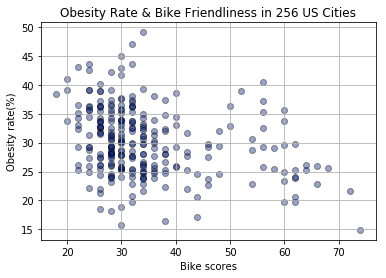

In [25]:
#create a scatter plot to see the connection between bike scores and obesity rates
plt.scatter(new_scale_bike_sc, data_table_to_use['Obesity Rank'], edgecolor='black', linewidths=1,
            marker='o',cmap='viridis', alpha=0.4, label="Bike Score")

plt.style.use('seaborn-dark-palette')
plt.title(f'Obesity Rate & Bike Friendliness in 256 US Cities')
plt.ylabel("Obesity rate(%)")
plt.xlabel("Bike scores")
plt.grid(True)
# Save Figure
plt.savefig("Obesity Rate & Bike Friendliness in 256 US Cities.png")
plt.show()